# **Task 1: Load and Pre-Process Dataset**

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os
import random
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
def load_data(folder):
    """
        Load the dataset, included images and labels from the given folder.
        
        Parameters
        ----------
        folder: string
            Path of the folder saved dataset.
            
        Return
        ----------
        images: ndarray
            Output of images.
        labels: ndarray
            Output of labels.
    """
    # TODO: write your code here
    
    all_files = sorted(os.listdir(folder))
    images = [] #Empty list to store image data

    for file in all_files:
        if file.endswith(".jpg"):
            path_jpg = os.path.join(folder, file)
            images.append(cv.imread(path_jpg))
            
        if file.endswith(".csv"):
            path_csv = os.path.join(folder, file)
            df = pd.read_csv(path_csv)
            labels = df.loc[:,'label']
            labels = np.array(labels)
    
    images = np.array(images) #Coverting list of images to numpy array
   
    return images, labels  

In [26]:
def preprocess(X, y, train_size=0.8):
    """
        Normalize the features from the range [0, 255] to the range [0, 1].
        One-hot encode labels.
        Split the dataset into training set and test set. 
        
        Parameters
        ----------
        X: ndarray
            Input of images.
        y: ndarray
            Input of labels.
        train_size: float
            The proportion of the dataset to include in the train split.

        Return
        ----------
        X_train: ndarray
            Splitted features of the training data.
        y_train: ndarray
            Splitted labels of the traning data.
        X_test: ndarray
            Splitted features of the test data.
        y_test: ndarray
            Splitted labels of the test data.
    """
    # TODO: write your code here
    
    # One-hot encoding for X & y
    X_en = np.array(X)
    X_en = X_en.astype("float32")/255.0
    y_en = np.array(tf.one_hot(y, 4)) #depth=4; since there are 4 classes and then converting the output to numpy array

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_en, y_en, test_size=1-train_size, shuffle=True)
    
    return X_train, y_train, X_test, y_test  #returning output in ndarray

In [27]:
# TODO: load dataset
X, y = load_data('/content/drive/MyDrive/dataset')

# TODO: pre-process dataset
X_train, y_train, X_test, y_test = preprocess(X, y, train_size=0.8)

# TODO: print out shapes of X_train, y_train, X_test, and y_test

print(X_train.shape) #shape of the training dataset array
print(y_train.shape) #shape of the training label array
print(X_test.shape) #shape of the testing dataset array
print(y_test.shape) #shape of the testing label array

(759, 120, 120, 3)
(759, 4)
(190, 120, 120, 3)
(190, 4)


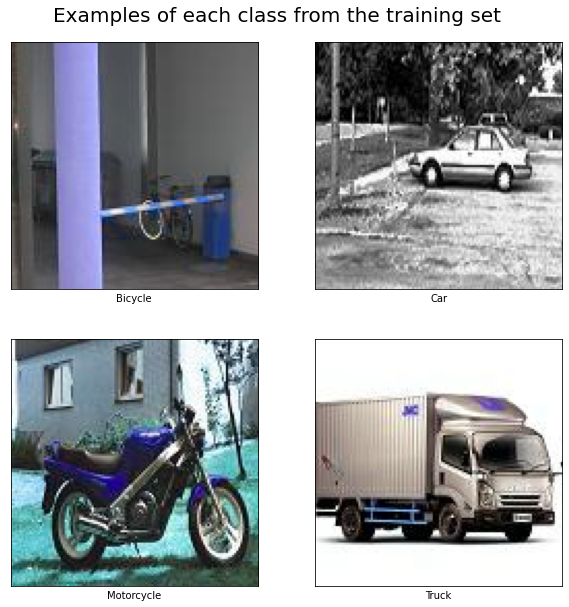

In [28]:
# TODO: get examples of each class from the training set

#defining the labels for each class for comparision
bicycle = np.array([1,0,0,0])
car = np.array([0,1,0,0])
motorcycle = np.array([0,0,1,0])
truck = np.array([0,0,0,1])

#creating empty list to store indexes of one example from every class
index = []

#taking index of one random element from each class
for i in range(0, len(y_train)):
    if np.array_equal(y_train[i,:], bicycle) == True:
        index.append(i)
        break
for i in range(0, len(y_train)):        
    if np.array_equal(y_train[i,:], car) == True:
        index.append(i)  
        break
for i in range(0, len(y_train)):        
    if np.array_equal(y_train[i,:], motorcycle) == True:
        index.append(i)
        break
for i in range(0, len(y_train)):
    if np.array_equal(y_train[i,:], truck) == True:
        index.append(i)
        break

# TODO: plot out selected examples in ONE figure

plt.figure(figsize=(10,10))
class_names = ['Bicycle', 'Car', 'Motorcycle', 'Truck']
plt.suptitle('Examples of each class from the training set', fontsize=20, y=0.93)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[index[i]])
    plt.xlabel(class_names[i])
plt.show()

# **Task 2: Build Convolutional Neural Network**

In [29]:
# TODO: build a CNN model

"""
Defining a sequential neural network model that takes the following hyperparameters as input: 

1) Kernel : Defines the kernel size in convolution
2) Strides : Defines the steps size in convolution
3) convLayerOne : Number of nodes in the first convolutional layer
4) convLayerTwo : Number of nodes in the second convolutional layer
5) hiddenLayerOne : Number of nodes in the first fully connected layer
6) hiddenLayerTwo : Number of nodes in the second fully connected layer
7) dropout : Defines the Dropout rate (useful to reduce overfitting)
"""

def my_model(kernel, strides, convLayerOne, convLayerTwo, hiddenLayerOne, hiddenLayerTwo, dropout):

  model = models.Sequential()
  model.add(layers.Input(shape=X_train.shape[1:], name="InputLayer"))
  model.add(layers.Conv2D(filters=convLayerOne, kernel_size=kernel, strides=strides, activation='relu', name="ConvLayer1"))
  model.add(layers.MaxPooling2D((2, 2), name="MaxPoolingLayer1"))
  model.add(layers.Dropout(rate=dropout, noise_shape=None, seed=None, name="DropoutLayer"))
  model.add(layers.Conv2D(filters=convLayerTwo, kernel_size=kernel, strides=strides, activation='relu', name="ConvLayer2"))
  model.add(layers.MaxPooling2D((2, 2), name="MaxPoolingLayer2"))

  model.add(layers.Flatten(name="FlattenLayer"))
  model.add(layers.Dense(hiddenLayerOne, activation='relu', name="HiddenLayer1"))
  model.add(layers.Dense(hiddenLayerTwo, activation='relu', name="HiddenLayer2"))
  model.add(layers.Dense(4, activation = 'softmax', name="OutputLayer"))

  return model

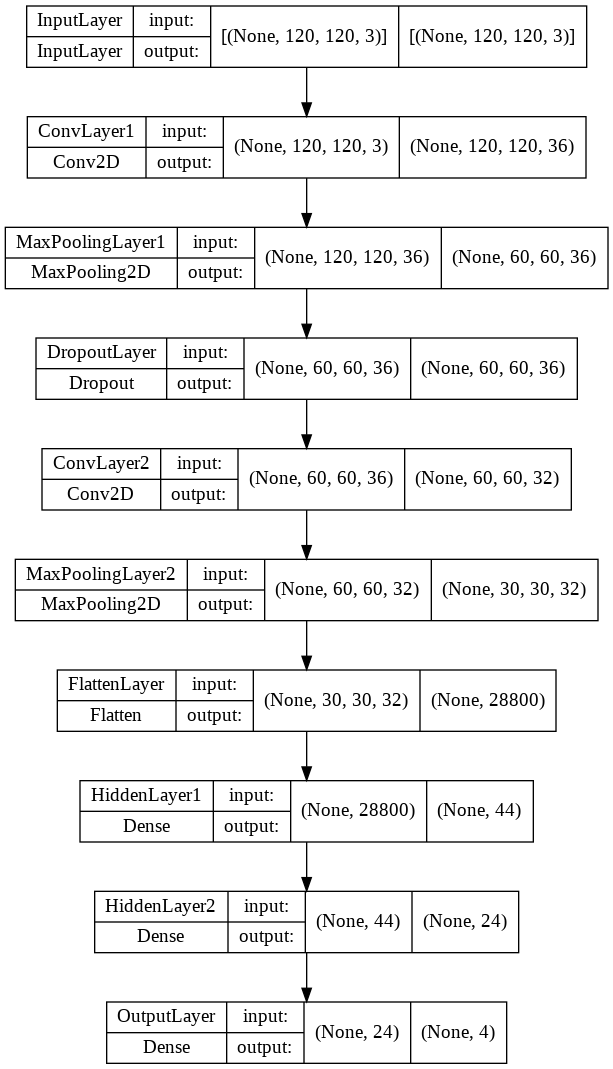

In [30]:
# TODO: visualize the model

#randomly initalizing the hyperparameters to visualize the model
model = my_model(kernel=1, strides=1, convLayerOne=36, convLayerTwo=32,hiddenLayerOne=44,hiddenLayerTwo=24,dropout=0.1) 

#visualizing the model 
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

# **Task 3: Train Model**

In [31]:
# TODO: initialize hyperparameters
"""
Initializing the model with the following hyperparameters:

kernel = (3,3)
strides = (1,1)
convLayerOne = 64
convLayerTwo = 128
hiddenLayerOne = 128
hiddenLayerTwo = 256
dropout = 0.1
"""
model = my_model(kernel=3, strides=1, convLayerOne=128, convLayerTwo=128, hiddenLayerOne=128, hiddenLayerTwo=256, dropout=0.1)

#learning rate for the model
learning_rate = 0.001  

#using adam as optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) 

#using categorical crossentropy erro
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [32]:
# TODO: train the model

#training and testing dataset after every epoch
history = model.fit(X_train, y_train, epochs=10, batch_size=48, verbose=2, validation_data=(X_test, y_test)) #Specifying the batch size = 48

Epoch 1/10
16/16 - 2s - loss: 1.9346 - accuracy: 0.3755 - val_loss: 1.3311 - val_accuracy: 0.3000 - 2s/epoch - 127ms/step
Epoch 2/10
16/16 - 1s - loss: 1.2882 - accuracy: 0.4453 - val_loss: 1.2417 - val_accuracy: 0.5211 - 1s/epoch - 69ms/step
Epoch 3/10
16/16 - 1s - loss: 1.0840 - accuracy: 0.5982 - val_loss: 1.0231 - val_accuracy: 0.5737 - 1s/epoch - 69ms/step
Epoch 4/10
16/16 - 1s - loss: 0.8715 - accuracy: 0.6627 - val_loss: 0.8684 - val_accuracy: 0.6526 - 1s/epoch - 69ms/step
Epoch 5/10
16/16 - 1s - loss: 0.7342 - accuracy: 0.7207 - val_loss: 0.8111 - val_accuracy: 0.6526 - 1s/epoch - 69ms/step
Epoch 6/10
16/16 - 1s - loss: 0.6069 - accuracy: 0.7694 - val_loss: 0.6385 - val_accuracy: 0.7737 - 1s/epoch - 69ms/step
Epoch 7/10
16/16 - 1s - loss: 0.4786 - accuracy: 0.8274 - val_loss: 0.6832 - val_accuracy: 0.7684 - 1s/epoch - 69ms/step
Epoch 8/10
16/16 - 1s - loss: 0.3623 - accuracy: 0.8748 - val_loss: 0.6311 - val_accuracy: 0.7684 - 1s/epoch - 69ms/step
Epoch 9/10
16/16 - 1s - loss: 0

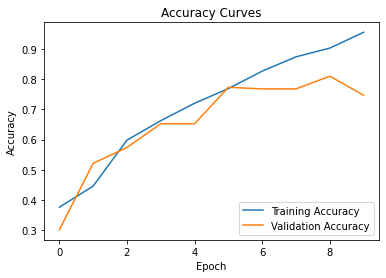

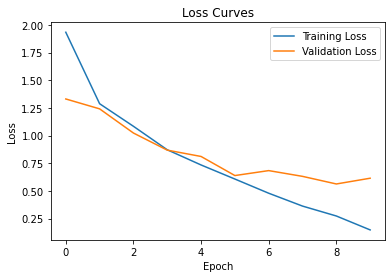

In [33]:
# TODO: visualize the training history including accuracy curves and loss curves

def plot(model):
  
  accuracy = plt.figure(1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy Curves')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

  loss = plt.figure(2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Loss Curves')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')

  return accuracy, loss

accuracy_curves, loss_curves = plot(model)

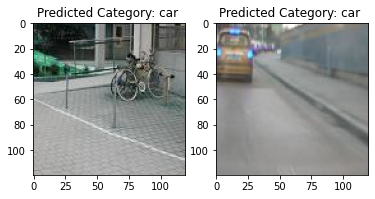

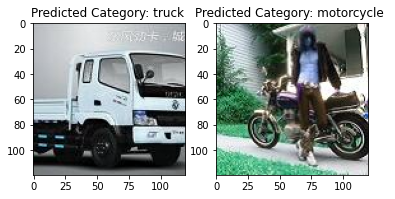

In [34]:
# TODO: visualize a couple of examples with predicted labels
classes = ['bicycle','car','motorcycle','truck']

# TODO: visualize some examples with predicted labels

###################################Example-1###################################

#taking a sample
sample = (X_test[32])
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample)
sample = sample.reshape(1,120,120,3)

#prediction
prediction = model.predict(sample)
if np.max(prediction)>0.5:
  i = np.argmax(prediction)
  category = classes[i]
t1 = plt.title("Predicted Category: %s " % category)

###################################Example-2###################################

#taking a sample
sample = (X_test[12])
plt.subplot(1,2,2)
plt.imshow(sample)
sample = sample.reshape(1,120,120,3)

#prediction
prediction = model.predict(sample)
if np.max(prediction)>0.5:
  i = np.argmax(prediction)
  category = classes[i]
t2 = plt.title("Predicted Category: %s " % category)

###################################Example-3###################################

#taking a sample
sample = (X_test[43])
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample)
sample = sample.reshape(1,120,120,3)

#prediction
prediction = model.predict(sample)
if np.max(prediction)>0.5:
  i = np.argmax(prediction)
  category = classes[i]
t3 = plt.title("Predicted Category: %s " % category)

###################################Example-4###################################

#taking a sample
sample = (X_test[102])
plt.subplot(1,2,2)
plt.imshow(sample)
sample = sample.reshape(1,120,120,3)

#prediction
prediction = model.predict(sample)
if np.max(prediction)>0.5:
  i = np.argmax(prediction)
  category = classes[i]
t4 = plt.title("Predicted Category: %s " % category)

# **Task 4: Tune Hyperparameters**

**Model-1: Increasing the number of neurons in the convolutional and hidden layers in the model**

Salient features of this model - 
1. Slight increase in accuracy compared to the previous model 
2. More training time compared to the previous model
3. Less overfitting due to addition of more layers

In [35]:
model1 = my_model(kernel=3, strides=1, convLayerOne=256, convLayerTwo=256,hiddenLayerOne=512,hiddenLayerTwo=512,dropout=0.1)

#learning rate for the model
learning_rate = 0.001  

#using adam as optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) 

#using categorical crossentropy error
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=10, batch_size=48, verbose=2, validation_data=(X_test, y_test)) #Specifying the batch size = 48

Epoch 1/10
16/16 - 3s - loss: 4.3945 - accuracy: 0.3347 - val_loss: 1.3047 - val_accuracy: 0.3000 - 3s/epoch - 201ms/step
Epoch 2/10
16/16 - 3s - loss: 1.2020 - accuracy: 0.5007 - val_loss: 1.0988 - val_accuracy: 0.4895 - 3s/epoch - 162ms/step
Epoch 3/10
16/16 - 3s - loss: 0.9680 - accuracy: 0.6179 - val_loss: 0.9867 - val_accuracy: 0.5895 - 3s/epoch - 162ms/step
Epoch 4/10
16/16 - 3s - loss: 0.7750 - accuracy: 0.7062 - val_loss: 0.8350 - val_accuracy: 0.6368 - 3s/epoch - 169ms/step
Epoch 5/10
16/16 - 3s - loss: 0.6897 - accuracy: 0.7312 - val_loss: 0.7245 - val_accuracy: 0.6789 - 3s/epoch - 162ms/step
Epoch 6/10
16/16 - 3s - loss: 0.5529 - accuracy: 0.8024 - val_loss: 0.7685 - val_accuracy: 0.6789 - 3s/epoch - 162ms/step
Epoch 7/10
16/16 - 3s - loss: 0.4145 - accuracy: 0.8538 - val_loss: 0.7830 - val_accuracy: 0.7105 - 3s/epoch - 162ms/step
Epoch 8/10
16/16 - 3s - loss: 0.3160 - accuracy: 0.8999 - val_loss: 0.7536 - val_accuracy: 0.7579 - 3s/epoch - 163ms/step
Epoch 9/10
16/16 - 3s - 

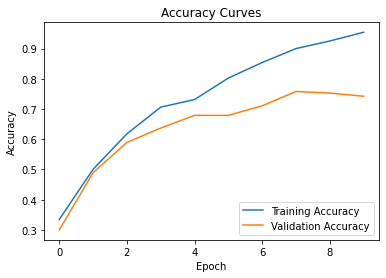

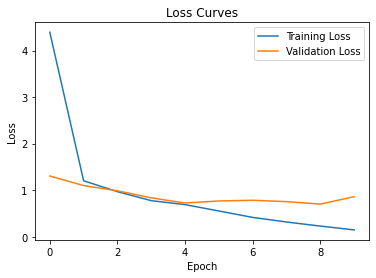

In [36]:
accuracy, loss = plot(model1)

**Model-2: Adding one more dropout layer, decreasing the learning rate and increasing the number of epochs**

Essentially, the dropout layer disables neurons in the preceding layer randomly on the basis of the specified dropout rate. The main aim of adding a dropout layer is to fine tune the model while avoiding the risk of overfitting. Also, with an additional dropout layer learning rate is decreased slightly to allow for smoth coversion and the number of epochs has been increase from 10 to 15 to give the model sufficient time to train.  

Salient features of this model - 
1. There is an increase in accuracy, mainly because 
2. More training time compared to the previous model
3. Less overfitting due to addition of more layers

In [37]:
def my_model(kernel, strides, convLayerOne, convLayerTwo, hiddenLayerOne, hiddenLayerTwo, dropout):

  model = models.Sequential()
  model.add(layers.Input(shape=X_train.shape[1:], name="InputLayer"))
  model.add(layers.Conv2D(filters=convLayerOne, kernel_size=kernel, strides=strides, activation='relu', name="ConvLayer1"))
  model.add(layers.MaxPooling2D((2, 2), name="MaxPoolingLayer1"))
  model.add(layers.Dropout(rate=dropout, noise_shape=None, seed=None, name="DropoutLayer1"))
  model.add(layers.Conv2D(filters=convLayerTwo, kernel_size=kernel, strides=strides, activation='relu', name="ConvLayer2"))
  model.add(layers.MaxPooling2D((2, 2), name="MaxPoolingLayer2"))

  model.add(layers.Flatten(name="FlattenLayer"))
  model.add(layers.Dense(hiddenLayerOne, activation='relu', name="HiddenLayer1"))
  model.add(layers.Dropout(rate=dropout, noise_shape=None, seed=None, name="DropoutLayer2"))
  model.add(layers.Dense(hiddenLayerTwo, activation='relu', name="HiddenLayer2"))
  model.add(layers.Dense(4, activation = 'softmax', name="OutputLayer"))

  return model

In [38]:
model2 = my_model(kernel=3, strides=1, convLayerOne=32, convLayerTwo=32,hiddenLayerOne=64,hiddenLayerTwo=64,dropout=0.1)

#learning rate for the model
learning_rate = 0.001  

#using adam as optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) 

#using categorical crossentropy error
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=10, batch_size=48, verbose=2, validation_data=(X_test, y_test)) #Specifying the batch size = 48

Epoch 1/10
16/16 - 1s - loss: 1.5643 - accuracy: 0.3228 - val_loss: 1.3587 - val_accuracy: 0.5474 - 979ms/epoch - 61ms/step
Epoch 2/10
16/16 - 0s - loss: 1.3036 - accuracy: 0.4335 - val_loss: 1.2911 - val_accuracy: 0.5842 - 360ms/epoch - 22ms/step
Epoch 3/10
16/16 - 0s - loss: 1.1808 - accuracy: 0.5349 - val_loss: 1.1233 - val_accuracy: 0.5316 - 341ms/epoch - 21ms/step
Epoch 4/10
16/16 - 0s - loss: 0.9617 - accuracy: 0.6192 - val_loss: 0.8851 - val_accuracy: 0.6368 - 342ms/epoch - 21ms/step
Epoch 5/10
16/16 - 0s - loss: 0.7766 - accuracy: 0.7062 - val_loss: 0.8172 - val_accuracy: 0.6632 - 338ms/epoch - 21ms/step
Epoch 6/10
16/16 - 0s - loss: 0.7127 - accuracy: 0.7233 - val_loss: 0.8599 - val_accuracy: 0.6316 - 340ms/epoch - 21ms/step
Epoch 7/10
16/16 - 0s - loss: 0.6013 - accuracy: 0.7694 - val_loss: 0.7857 - val_accuracy: 0.6684 - 334ms/epoch - 21ms/step
Epoch 8/10
16/16 - 0s - loss: 0.5379 - accuracy: 0.7879 - val_loss: 0.6536 - val_accuracy: 0.7526 - 356ms/epoch - 22ms/step
Epoch 9/

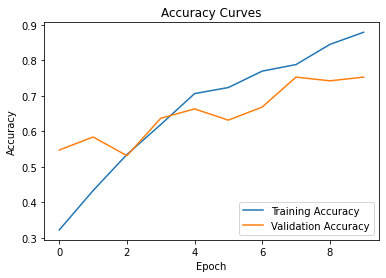

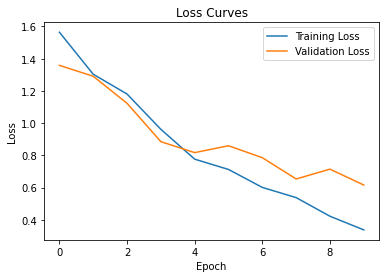

In [39]:
accuracy, loss = plot(model2)

**Write your analysis here in a beautiful format.**

*In this assignment, I have worked with four different models and based on that I would like to analyze on th following points - *

The first parameter to tune should be the number of neurons in each hidden layer. In this assignment, I have tuned the neurons in my optimal model. But however, when this is something which I have understood should be the first step in hyperparameter tuning. 

*Here's how each of these parameters was affecting the training and testing process - *

**Learning Rate:-** It is as an essential hyperparameter that defines the step size for the model. A lower learning rate was keeping the model from reaching the minima and would need more number of epochs. While a higher learning rate was making the model learn faster, but at times it may miss the minimum loss function and would only reach in the vicinity of it. On the other hand, a lower learning rate was giving a better chance to reach the minimum loss function, but as a tradeoff it needed higher number of epochs that means more computational power. 

**Batch Size:-** Batch size essentially controls the accuracy of the error gradient during training of the neural network. A larger batch size was leading to faster training, but at the same time it was a trade-off in good training. In other words, small batch size leads to less accuracy of error gradient.

**Number of Epochs:-** My choice of this parameter was based on the limitation of computational resources available. However, I found that on average 10-15 epochs was leading to moderate accuracy even without un-tuned hyperparameters. In some cases, I was able to achieve over 80% test accuracy with only 5 epochs and tuned hyperparameters. 

**Dropout:-** The main idea behind the implementation of dropout was to prevent the model from overfitting. Also, it was important to assign the right value to dropout, since a high value would hamper the training and a low value won’t make a difference. In all the models dropout rate was specified to be 0.1. 

**Number of Neurons:-** It is a crucial parameter in determining the final output from the model. Less neurons in the hidden layers was leading to an underfit model, mainly because the model was lacking complexity. Whereas more neurons was leading to an overfit model. Therefore, it is crucial to decide the right number of neurons in each layer of the neural network.

**Filter size and strides:-** In all the models, a filter size of 3x3 and stride of size 1x1 was used, because small value of filter size and stride is known to lead to better accuracy. 

Overall, I would conclude with the following points - 

1. It might be helpful to observe and understand the trend of accuracy plot by monitoring validation/test loss early in the training, tune the layers in the network and hyper-parameters with short runs of a few epochs.

2. Learning rate and batch-size played a crucial role in determining the speed of convergence, so it is essential to tune these parameters first.




# **Task 5: Conclusion**

**Optimal-Model**: Increasing the number of neurons

Essentially, this model is an improvement over the last model since it has more number of neurons in the hidden layers. Morevoer, it also has the same extra dropout layer as in the last model, the purpose of which is to disable neurons in the preceding layer randomly on the basis of the specified dropout rate. 

Salient features of this model - 
1. There is an increase in accuracy, mainly because of the addition of neurons in the hidden layers and optimizing the other hyperparameters
2. More training time compared to the previous model due to more parameters to calculate
3. Less overfitting due to addition of dropout layer and neurons

In [40]:
# TODO: visualize the optimal model


def my_model(kernel, strides, convLayerOne, convLayerTwo, hiddenLayerOne, hiddenLayerTwo, dropout):

  model = models.Sequential()
  model.add(layers.Input(shape=X_train.shape[1:], name="InputLayer"))
  model.add(layers.Conv2D(filters=convLayerOne, kernel_size=kernel, strides=strides, activation='relu', name="ConvLayer1"))
  model.add(layers.MaxPooling2D((2, 2), name="MaxPoolingLayer1"))
  model.add(layers.Dropout(rate=dropout, noise_shape=None, seed=None, name="DropoutLayer1"))
  model.add(layers.Conv2D(filters=convLayerTwo, kernel_size=kernel, strides=strides, activation='relu', name="ConvLayer2"))
  model.add(layers.MaxPooling2D((2, 2), name="MaxPoolingLayer2"))

  model.add(layers.Flatten(name="FlattenLayer"))
  model.add(layers.Dense(hiddenLayerOne, activation='relu', name="HiddenLayer1"))
  model.add(layers.Dropout(rate=dropout, noise_shape=None, seed=None, name="DropoutLayer2"))
  model.add(layers.Dense(hiddenLayerTwo, activation='relu', name="HiddenLayer2"))
  model.add(layers.Dense(4, activation = 'softmax', name="OutputLayer"))

  return model

**List hyperparameters and their values of your optimal model**

Initializing the model with the following hyperparameters:

1. **Kernel** : Defines the kernel size in convolution = **(3,3)**
2. **Strides** : Defines the steps size in convolution = **(1,1)**
3. **convLayerOne** : Number of nodes in the first convolutional layer = **32**
4. **convLayerTwo** : Number of nodes in the second convolutional layer = **32**
5. **hiddenLayerOne** : Number of nodes in the first fully connected layer = **128**
6. **hiddenLayerTwo** : Number of nodes in the second fully connected layer = **256**
7. **dropout** : Defines the Dropout rate (useful to reduce overfitting) = **0.1**
8. **batch-size** : Defines the batch-size = **20**
9. **learning-rate** : Specifying the learning rate for the model = **0.0005**




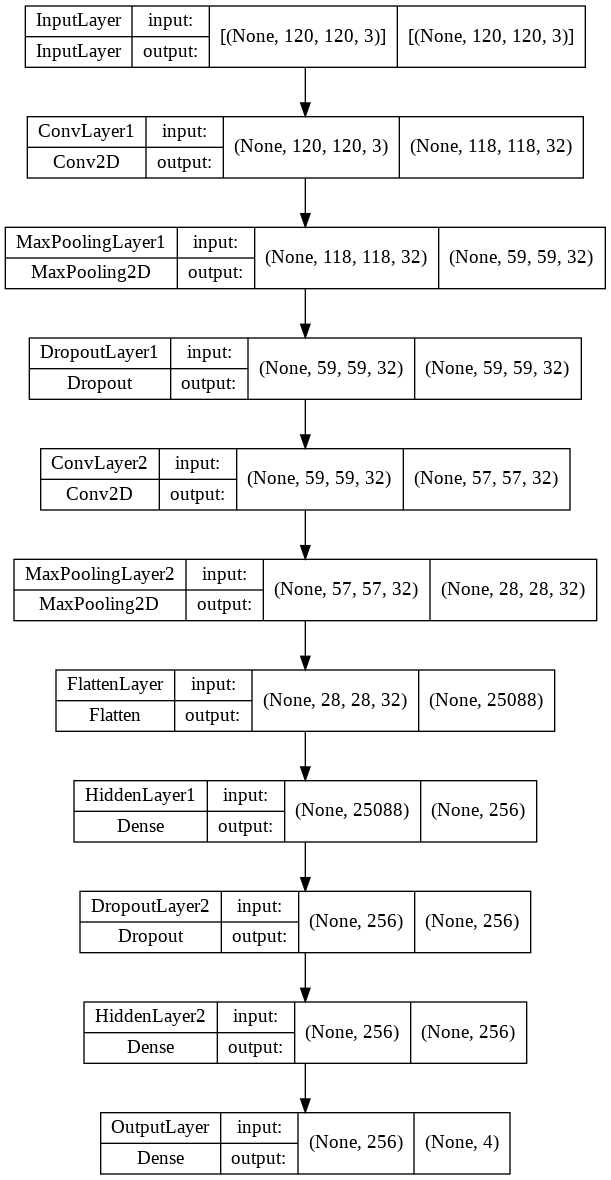

In [52]:
model3 = my_model(kernel=3, strides=1, convLayerOne=32, convLayerTwo=32, hiddenLayerOne=256, hiddenLayerTwo=256, dropout=0.1)

tf.keras.utils.plot_model(
    model3, to_file='model3.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

In [53]:
#learning rate for the model
learning_rate = 0.001 

#using adam as optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate) 

#using categorical crossentropy loss
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model3.fit(X_train, y_train, epochs=10, batch_size=20, verbose=2, validation_data=(X_test, y_test)) #Specifying the batch size = 20

Epoch 1/10
38/38 - 2s - loss: 1.2394 - accuracy: 0.4756 - val_loss: 1.1338 - val_accuracy: 0.4895 - 2s/epoch - 61ms/step
Epoch 2/10
38/38 - 1s - loss: 0.8680 - accuracy: 0.6772 - val_loss: 0.8905 - val_accuracy: 0.5895 - 619ms/epoch - 16ms/step
Epoch 3/10
38/38 - 1s - loss: 0.6178 - accuracy: 0.7734 - val_loss: 0.6762 - val_accuracy: 0.7368 - 632ms/epoch - 17ms/step
Epoch 4/10
38/38 - 1s - loss: 0.3299 - accuracy: 0.8748 - val_loss: 0.6603 - val_accuracy: 0.7526 - 653ms/epoch - 17ms/step
Epoch 5/10
38/38 - 1s - loss: 0.2563 - accuracy: 0.9117 - val_loss: 0.6243 - val_accuracy: 0.7842 - 661ms/epoch - 17ms/step
Epoch 6/10
38/38 - 1s - loss: 0.1226 - accuracy: 0.9605 - val_loss: 0.6456 - val_accuracy: 0.8000 - 731ms/epoch - 19ms/step
Epoch 7/10
38/38 - 1s - loss: 0.0726 - accuracy: 0.9802 - val_loss: 0.7540 - val_accuracy: 0.8105 - 601ms/epoch - 16ms/step
Epoch 8/10
38/38 - 1s - loss: 0.1011 - accuracy: 0.9671 - val_loss: 0.8227 - val_accuracy: 0.7579 - 579ms/epoch - 15ms/step
Epoch 9/10


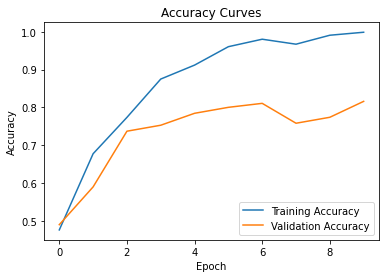

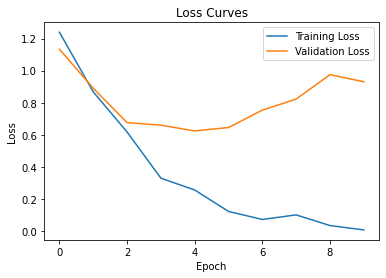

In [54]:
# TODO: visualize the training history including accuracy curves and loss curves of your optimal model
accuracy, loss = plot(model3)

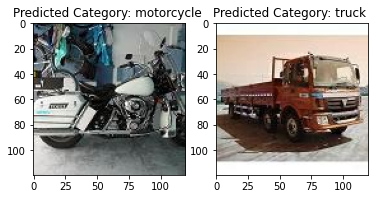

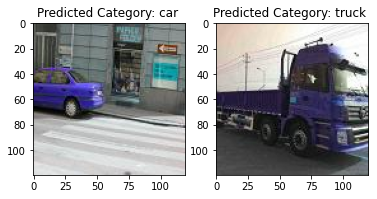

In [57]:
# TODO: visualize some examples with predicted labels

###################################Example-1###################################

#Taking a sample
sample = (X_test[55])
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample)
sample = sample.reshape(1,120,120,3)

#Prediction
prediction = model3.predict(sample)
if np.max(prediction)>0.5:
  i = np.argmax(prediction)
  category = classes[i]
t1 = plt.title("Predicted Category: %s " % category)

###################################Example-2###################################

#Taking a sample
sample = (X_test[6])
plt.subplot(1,2,2)
plt.imshow(sample)
sample = sample.reshape(1,120,120,3)

#Prediction
prediction = model3.predict(sample)
if np.max(prediction)>0.5:
  i = np.argmax(prediction)
  category = classes[i]
t2 = plt.title("Predicted Category: %s " % category)

###################################Example-3###################################

#Taking a sample
sample = (X_test[25])
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample)
sample = sample.reshape(1,120,120,3)

#Prediction
prediction = model3.predict(sample)
if np.max(prediction)>0.5:
  i = np.argmax(prediction)
  category = classes[i]
t3 = plt.title("Predicted Category: %s " % category)

###################################Example-4###################################

#Taking a sample
sample = (X_test[34])
plt.subplot(1,2,2)
plt.imshow(sample)
sample = sample.reshape(1,120,120,3)

#Prediction
prediction = model3.predict(sample)
if np.max(prediction)>0.5:
  i = np.argmax(prediction)
  category = classes[i]
t4 = plt.title("Predicted Category: %s " % category)